In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [20]:
sustainability = pd.read_csv('unsdg_2002_2021.csv')
sustainability.rename(columns = {'dt_year':'year', 'dt_date':'date', 'greenhousegas_emissione_mtco2equivalent':'ghg_mtco2', 'total_government_revenue_proportion_of_gdp_perc': 'revenue_gdp_perc', 'renewable_energy_share_on_the_total_energy_consumption': 'renewable_share_total'}, inplace =True)
sustainability.head()


,year,date,country,region,level_of_development,ghg_mtco2,revenue_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_share_total,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area
0,2002,2002-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,NaN,0.68,0.420344,8.0,NaN,37.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.120955,50.00,0.105249,9.0,NaN,36.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,2004-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.176214,57.80,-0.014901,11.0,NaN,44.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,2005-01-01,Afghanistan,Central and Southern Asia,Least Developed,19.32802,0.180929,186.90,0.036212,12.0,0.409,33.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,2006-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.302234,271.00,0.053648,14.0,NaN,31.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ghg_mtco2: total greenhouse gas emissions (GHG) equivalent to a metric tonne of CO2
revenue_gdp_perc : total revenues coming from government proportional to GDP
renewable_share_total : renewable energy share on the total energy consumption

In [21]:
print(len(sustainability))

5176


In [22]:
print(sustainability.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   year                                                             5176 non-null   int64  
 1   date                                                             5176 non-null   object 
 2   country                                                          5176 non-null   object 
 3   region                                                           5176 non-null   object 
 4   level_of_development                                             5176 non-null   object 
 5   ghg_mtco2                                                        1192 non-null   float64
 6   revenue_gdp_perc                                                 2693 non-null   float64
 7   fdi_inflows_millionusd                    

In [23]:
sustainability['year'] = pd.DatetimeIndex(pd.to_datetime(sustainability['year'], format='%Y')).year
sustainability['date'] = pd.to_datetime(sustainability['date'], format='%Y-%m-%d')


In [24]:
sustainability.duplicated(subset=['date', 'country']).sum()

0

In [25]:
print(sustainability['year'].unique())
print(sustainability['country'].nunique())
print(sustainability['region'].unique())
print(sustainability['level_of_development'].unique())
print(sustainability['education_for_sustainable_development'].unique())

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021]
259
['Central and Southern Asia' 'Europe and North America'
 'North Africa and Western Asia' 'Other' 'Sub-Saharan Africa'
 'Latin America and the Caribbean' 'Oceania'
 'Eastern and South Eastern Asia']
['Least Developed' 'Not Specified' 'Economies in Transition'
 'Developing Economies' 'Developed Economies']
[  nan 0.    0.719 0.625 1.    0.875 0.831 0.813 0.95  0.583 0.563 0.619
 0.844 0.969 0.838 0.75  0.35  0.859 0.575 0.513 0.413]


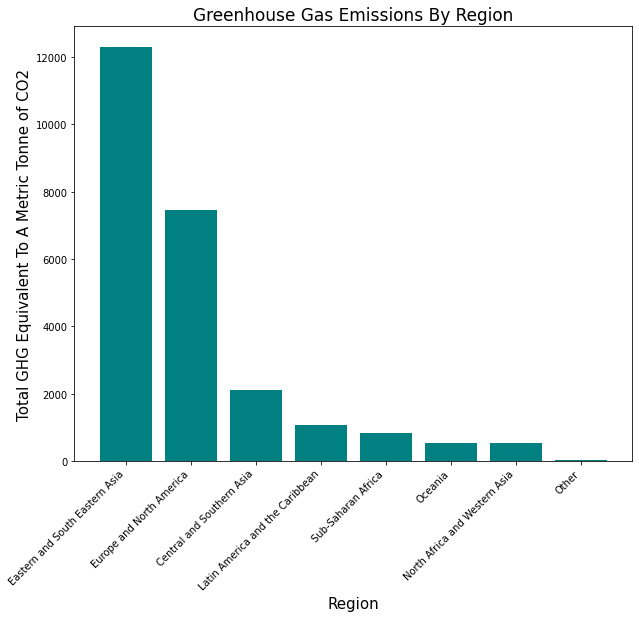

In [26]:
ghg_sustainability = sustainability.sort_values('ghg_mtco2', ascending = False)
ghg_sustainability.dropna(subset = ['ghg_mtco2'], inplace = True)
plt.figure(figsize = (10,8))
ax1 = plt.subplot()
plt.bar(ghg_sustainability['region'], ghg_sustainability['ghg_mtco2'], color = 'teal')
ax1.set_title('Greenhouse Gas Emissions By Region', fontsize = 17)
ax1.set_xlabel('Region', fontsize = 15)
plt.setp(ax1.get_xticklabels(), ha="right", rotation=45)
ax1.set_ylabel('Total GHG Equivalent To A Metric Tonne of CO2', fontsize = 15)
plt.show()

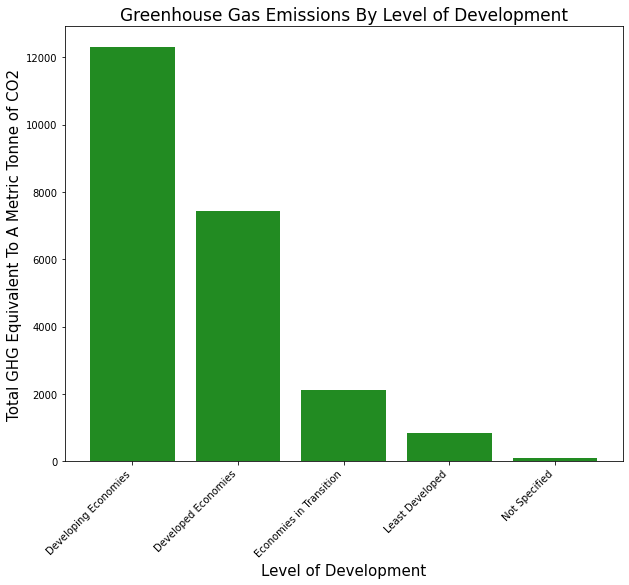

In [27]:
plt.figure(figsize = (10,8))
ax2 = plt.subplot()
plt.bar(ghg_sustainability['level_of_development'], ghg_sustainability['ghg_mtco2'], color = 'forestgreen')
ax2.set_title('Greenhouse Gas Emissions By Level of Development', fontsize = 17)
ax2.set_xlabel('Level of Development', fontsize = 15)
plt.setp(ax2.get_xticklabels(), ha="right", rotation=45)
ax2.set_ylabel('Total GHG Equivalent To A Metric Tonne of CO2', fontsize = 15)
plt.show()

In [28]:
def avg_by_year(dataset, column):
    dataset_new = dataset.dropna(subset = [column])
    years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,2021]
    avg_by_year_dict = {}
    for y in years:
        avg_by_year_dict.update({y:[]})
        for i in range(len(dataset_new)):
            if dataset_new.iloc[i]['year'] == y:
                avg_by_year_dict[y].append(dataset_new.iloc[i][column])
        if avg_by_year_dict[y] == []:
            avg_by_year_dict.pop(y)
        else:
            avg_by_year_dict.update({y:np.mean(avg_by_year_dict[y])})
    return avg_by_year_dict

In [29]:
avg_year_sust = avg_by_year(ghg_sustainability,'ghg_mtco2')
print(avg_year_sust)
years = list(avg_year_sust.keys())
avg_ghg = list(avg_year_sust.values())


{2002: 291.6765214666666, 2003: 295.0564613333334, 2004: 293.26905999999997, 2005: 334.7696027659575, 2006: 271.9537211111111, 2007: 305.7070684722222, 2008: 307.02959652777776, 2009: 300.5834397058823, 2010: 395.0861145555555, 2011: 339.2065420967742, 2012: 474.13302763888885, 2013: 336.0202096774193, 2014: 575.4238569090911, 2015: 357.96810129629625, 2016: 378.1393806, 2017: 370.67866478260873, 2018: 390.2968513636364, 2019: 389.13981476190474}


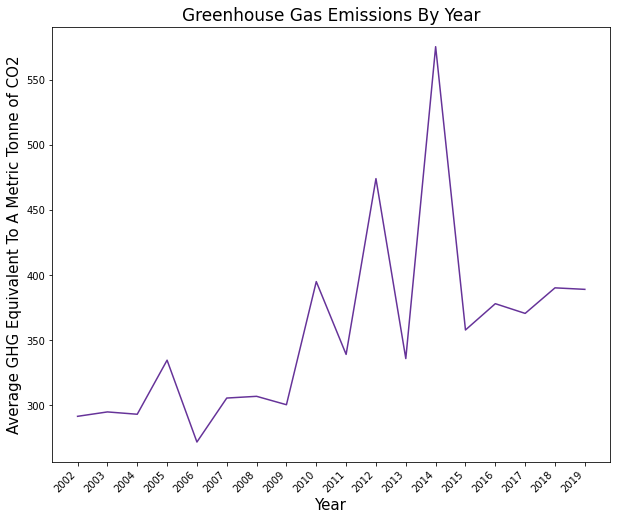

In [30]:
plt.figure(figsize = (10,8))
ax3 = plt.subplot()
plt.plot(years, avg_ghg, color = 'rebeccapurple')
ax3.set_title('Greenhouse Gas Emissions By Year', fontsize = 17)
ax3.set_xlabel('Year', fontsize = 15)
ax3.set_xticks(years)
ax3.set_xticklabels(years, ha="right", rotation=45)
ax3.set_ylabel('Average GHG Equivalent To A Metric Tonne of CO2', fontsize = 15)
plt.show()